In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Electric Vehicle Sales by State in India.csv')
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


# Data Cleaning

In [6]:
def clean_ev_dataset(df):

    # Remove duplicate rows if any
    df = df.drop_duplicates()

    # Convert columns to appropriate datatypes
    if 'Year' in df.columns:
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Convert known categorical columns to 'category' dtype
    categorical_cols = ['MonthName', 'State', 'VehicleClass', 'VehicleCategory', 'VehicleType']
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')
    
    # Handle missing values
    # For numeric columns, fill NaNs with median or zero
    num_cols = df.select_dtypes(include='number').columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())

    # For categorical columns, fill NaNs with mode or 'Unknown'
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')
    
    return df

df = clean_ev_dataset(df)

# Data Understanding

In [9]:
def data_understanding(df):
    print(f"{'*' * 50} Data Information {'*' * 50}")
    display(df.info())
    
    print(f"\n{'*' * 50} Checking For Duplicate Rows {'*' * 50}")
    display(f"Total Duplicates: {df.duplicated().sum()}")
    
    print(f"\n{'*' * 50} Numerical Columns Summary {'*' * 50}")
    display(df.describe())
    
    print(f"\n{'*' * 50} Categorical Columns Summary {'*' * 50}")
    display(df.describe(include='object'))
    
    print(f"\n{'*' * 50} Sample Data {'*' * 50}")
    display(df.head())

data_understanding(df)

************************************************** Data Information **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), object(4)
memory usage: 4.9+ MB


None


************************************************** Checking For Duplicate Rows **************************************************


'Total Duplicates: 0'


************************************************** Numerical Columns Summary **************************************************


,Year,Date,EV_Sales_Quantity
count,96845.000000,96845,96845.000000
mean,2018.622768,2019-01-28 11:00:33.641385728,37.108896
min,2014.000000,2014-01-01 00:00:00,0.000000
25%,2016.000000,2016-08-01 00:00:00,0.000000
50%,2019.000000,2019-02-01 00:00:00,0.000000
75%,2021.000000,2021-09-01 00:00:00,0.000000
max,2024.000000,2024-01-01 00:00:00,20584.000000
std,2.895581,NaN,431.566675



************************************************** Categorical Columns Summary **************************************************


,Month_Name,Vehicle_Class,Vehicle_Category,Vehicle_Type
count,96845,96845,96845,96845
unique,12,73,5,12
top,jan,MOTOR CAR,Others,Others
freq,8853,4111,54423,54423



************************************************** Sample Data **************************************************


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


# Data Visualization

In [12]:
df.columns = df.columns.str.strip()

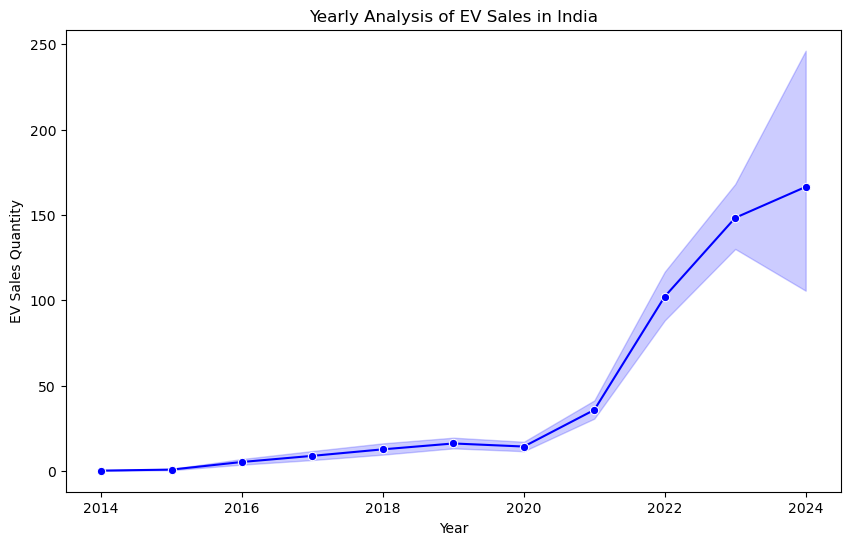

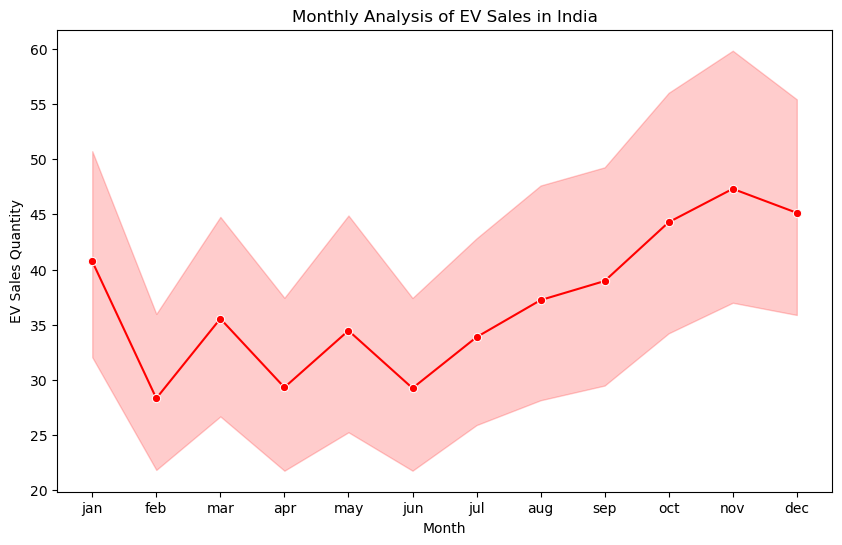

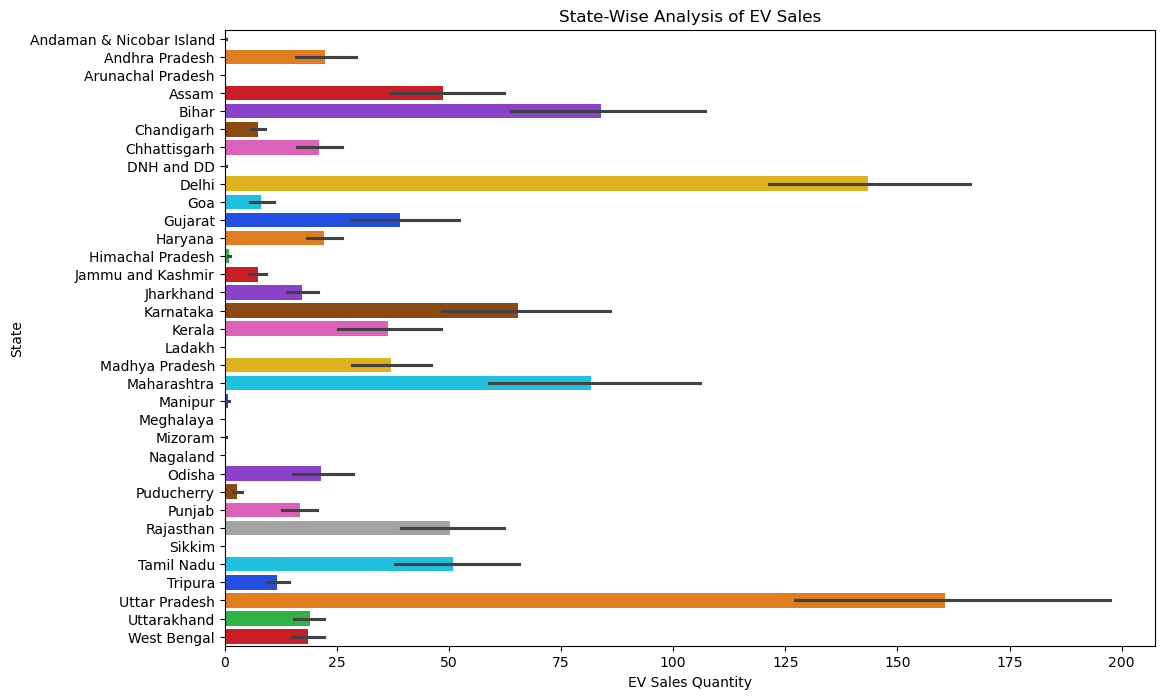

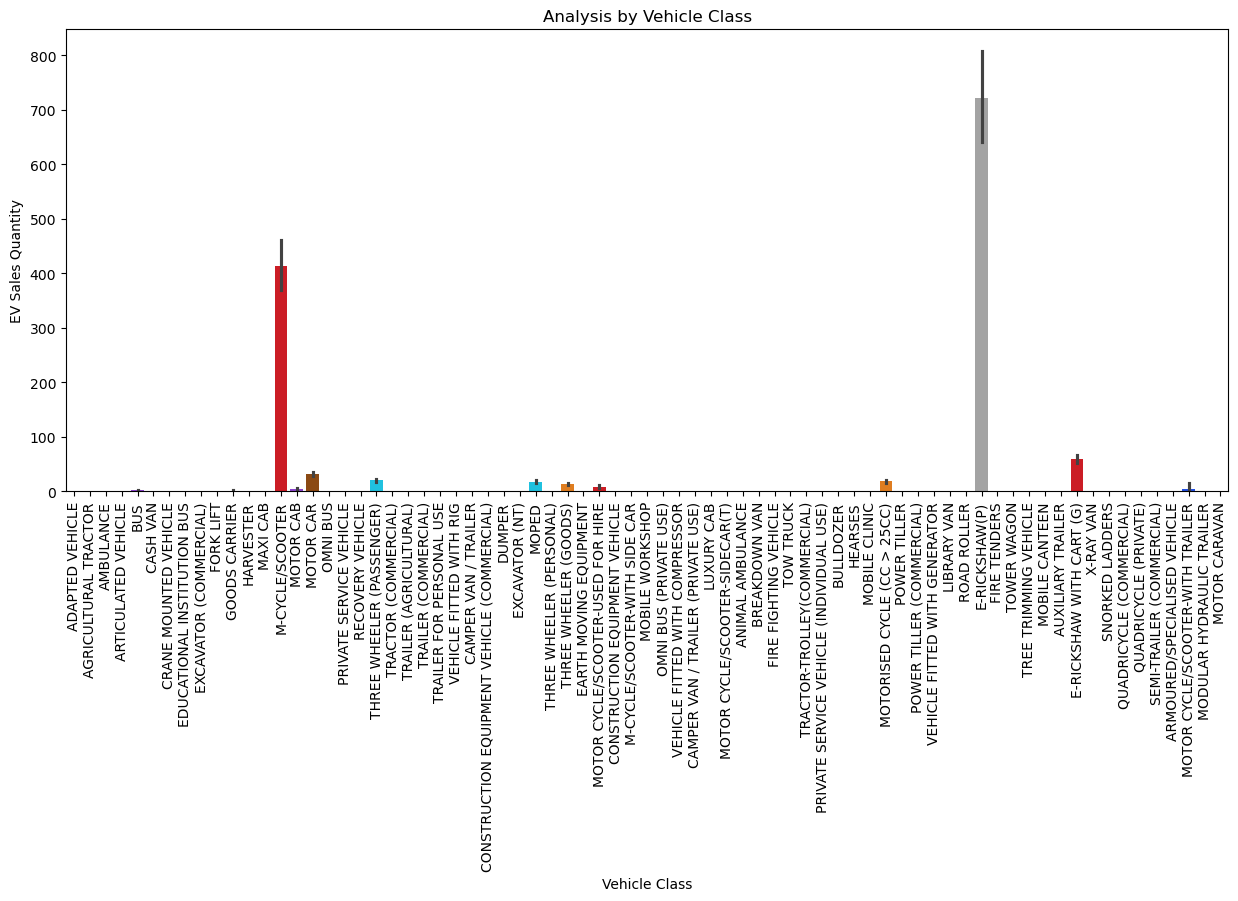

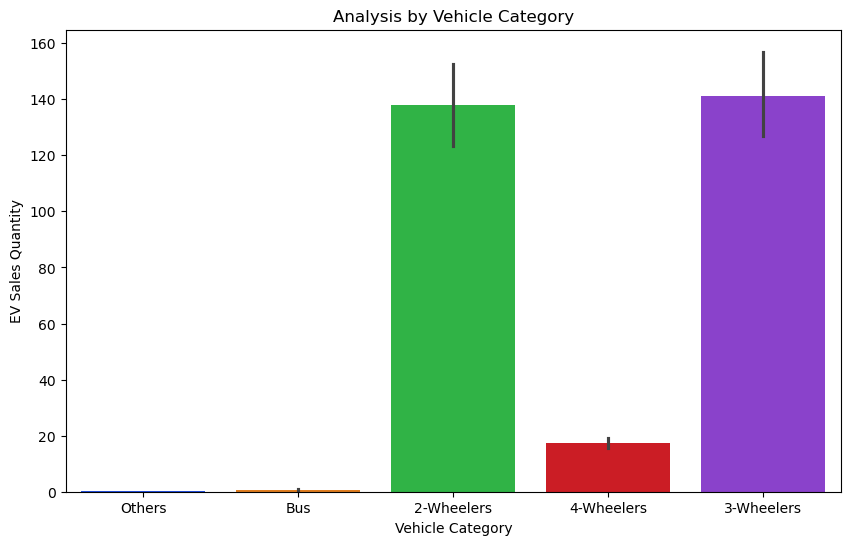

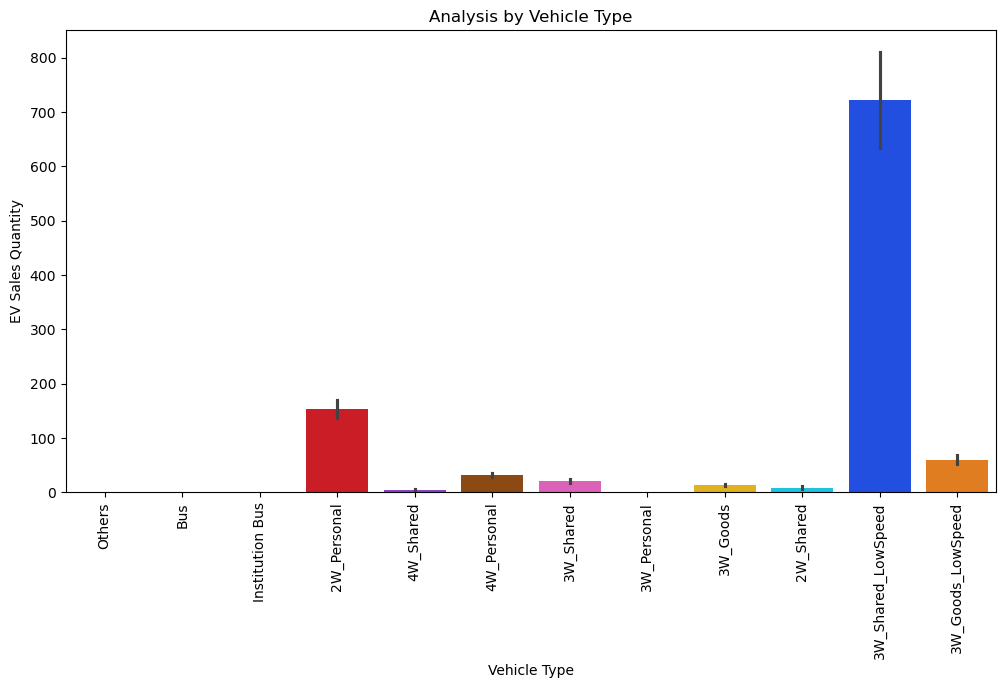

In [14]:
def visualize_ev_sales(df):

    plt.figure(figsize=(10, 6))
    plt.title('Yearly Analysis of EV Sales in India')
    sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity', marker='o', color='b')
    plt.xlabel('Year')
    plt.ylabel('EV Sales Quantity')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.title('Monthly Analysis of EV Sales in India')
    sns.lineplot(data=df, x='Month_Name', y='EV_Sales_Quantity', marker='o', color='r')
    plt.xlabel('Month')
    plt.ylabel('EV Sales Quantity')
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.title('State-Wise Analysis of EV Sales')
    sns.barplot(data=df, y='State', x='EV_Sales_Quantity', hue='State', dodge=False, palette='bright')
    plt.xlabel('EV Sales Quantity')
    plt.ylabel('State')
    plt.show()

    plt.figure(figsize=(15, 6))
    plt.title('Analysis by Vehicle Class')
    sns.barplot(data=df, x='Vehicle_Class', y='EV_Sales_Quantity', hue='Vehicle_Class', palette='bright')
    plt.xlabel('Vehicle Class')
    plt.ylabel('EV Sales Quantity')
    plt.xticks(rotation=90)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.title('Analysis by Vehicle Category')
    sns.barplot(data=df, x='Vehicle_Category', y='EV_Sales_Quantity', hue='Vehicle_Category', palette='bright')
    plt.xlabel('Vehicle Category')
    plt.ylabel('EV Sales Quantity')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.title('Analysis by Vehicle Type')
    sns.barplot(data=df, x='Vehicle_Type', y='EV_Sales_Quantity', hue='Vehicle_Type', palette='bright')
    plt.xlabel('Vehicle Type')
    plt.ylabel('EV Sales Quantity')
    plt.xticks(rotation=90)
    plt.show()

visualize_ev_sales(df)

In [14]:
# Clean and Save Processed Data
df.to_csv('Electric_Vehicles_Cleaned.csv', index=False)

# Machine Learning 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
feature_cols = ['Year', 'Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
target_col = 'EV_Sales_Quantity'

In [20]:
categorical_cols = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
df_encoded = pd.get_dummies(df[feature_cols], columns=categorical_cols, drop_first=True)

In [ ]:
# Build feature matrix and target vector
X = df_encoded
y = df[target_col]

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# # Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 158.38332909586697


# Insights

In [2]:
def insights_suggestions():
    print(f"{'*' * 50} Insights {'*' * 50}")

    print(
        '''
1. EV Sales Trends Over Time
    - Electric vehicle sales show a rising trend from 2014 through recent years, indicating increased adoption.
    - Some seasonal variations appear with monthly sales fluctuations, influenced possibly by festivals or market cycles.

2. Vehicle Type Distribution
    - Majority of sales concentrate in key vehicle classes: MOTOR CAR, SCOOTER, MOTORCYCLE, and MOPED.
    - Other vehicle types such as AGRICULTURAL TRACTOR, BUS, and others have very low or negligible sales volume.

3. State-Wise Sales Patterns
    - Certain states like Maharashtra, Tamil Nadu, and Karnataka dominate EV sales figures.
    - States with early adoption and better infrastructure show consistently higher monthly sales.

4. Vehicle Category Insights
    - The 'Others' category in vehicle category and type represents a small proportion of the sales.
    - Mainstream categories reflect sales drivers and market focus areas.

5. Data Quality and Completeness
    - The dataset is clean with no duplicates and handled missing values appropriately through median and mode imputation.
    - Categorical variables were properly converted for analysis.

6. Predictive Modeling Potential
    - The data is well-prepared for machine learning models to forecast future sales or classify vehicle types/states based on sales patterns.
    - Model insights could guide marketing, inventory, and infrastructure planning.
    '''
    )

    print(f"{'*' * 50} Suggestions {'*' * 50}")

    print(
        '''
1. Boost EV Adoption in Lower-Sales States
    - Focus policy and infrastructure development in states with low EV sales to broaden market penetration.
    - Tailor incentives and awareness campaigns specifically for these regions.

2. Leverage Seasonal Sales Patterns
    - Align marketing and promotional activities with identified seasonal peaks to maximize impact.
    - Prepare inventory and supply chains for anticipated demand surges.

3. Expand Vehicle Types with Low Sales
    - Explore potential market development for vehicle types currently underrepresented such as buses and agricultural vehicles.
    - Encourage innovation and subsidies in these niches.

4. Strengthen Data Collection and Monitoring
    - Maintain data integrity with regular updates and validation to support accurate trend analysis.
    - Incorporate external factors such as policy changes, fuel prices, and economic indicators.

5. Use Predictive Analytics for Strategic Decisions
    - Develop forecasting models to predict sales growth and guide resource allocation.
    - Utilize clustering or classification to segment states or vehicle types for targeted strategies.

6. Promote Electric Two-Wheelers and Cars
    - As these categories dominate sales, focus on enhancing features, financing options, and charging infrastructure.
    - Encourage adoption through urban-focused policy and subsidies.
    '''
    )
insights_suggestions()

************************************************** Insights **************************************************

1. EV Sales Trends Over Time
    - Electric vehicle sales show a rising trend from 2014 through recent years, indicating increased adoption.
    - Some seasonal variations appear with monthly sales fluctuations, influenced possibly by festivals or market cycles.

2. Vehicle Type Distribution
    - Majority of sales concentrate in key vehicle classes: MOTOR CAR, SCOOTER, MOTORCYCLE, and MOPED.
    - Other vehicle types such as AGRICULTURAL TRACTOR, BUS, and others have very low or negligible sales volume.

3. State-Wise Sales Patterns
    - Certain states like Maharashtra, Tamil Nadu, and Karnataka dominate EV sales figures.
    - States with early adoption and better infrastructure show consistently higher monthly sales.

4. Vehicle Category Insights
    - The 'Others' category in vehicle category and type represents a small proportion of the sales.
    - Mainstream categorie